<a href="https://colab.research.google.com/github/wolfinwallst/Financial_Engineering_and_Risk_Management/blob/main/Black_Scholes_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Black Scholes Equation의 풀이: 시뮬레이션](https://sine-qua-none.tistory.com/100) 참조.

옵션 가격의 현재 가격을
1. Monte-Carlo 시뮬레이션으로 구해서,
2. 블랙-숄즈 공식으로부터 도출해 낸 exact solution 과 비교한다.


result of simulation :97.636
result of s_cum_mean: 97.636
result of exact solution: 99.005


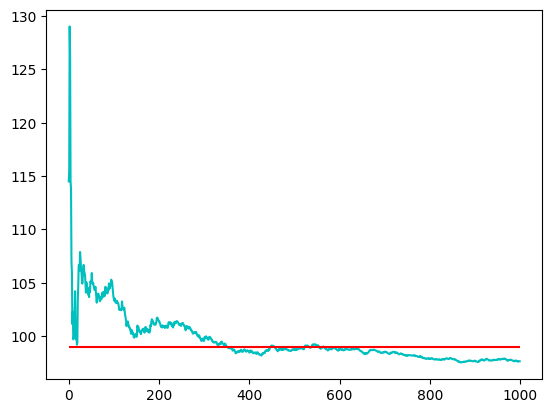

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def test_BSEquation():
    s0 = 100
    vol = 0.3
    r = 0.02
    d = 0.01
    maturity = 1

    nSimulation = 1000		# 표본의 개수
    drift = (r - d - 0.5 * vol ** 2) # maturity	#S_T 계산을 위해 효율적으로 drift와
    volsqrtmat = vol * np.sqrt(maturity)	#diffusion 항을 따로 계산해 놓음

    rn = np.random.normal(size=nSimulation)	# 표본의 개수만큼 정규분포 난수를 추출
    s_maturity = s0 * np.exp(drift + volsqrtmat * rn)

    s_cum_mean = np.cumsum(s_maturity) / np.arange(1, nSimulation + 1) * np.exp(-r * maturity)
    	# s_maturity 의 원소값을 누적으로 합한 것을 합해진 숫자만큼으로 나눈 값, 즉 표본 첫 i개의 평균
        # 을 의미. 여기에 할인팩터를 곱함

    simulation_result = np.mean(s_maturity) * np.exp(-r * maturity)
    	# 전체 표본의 평균에 할인팩터를 곱함

    exact_solution = s0 * np.exp(-d * maturity)
    	# exact solution : S0 e^{-dT}

    print('result of simulation :{:.3f}'.format(simulation_result))
    print('result of s_cum_mean: {:.3f}'.format(s_cum_mean[-1]))
    print('result of exact solution: {:.3f}'.format(exact_solution))

    plt.plot(s_cum_mean, color='c')
    plt.hlines(exact_solution, 0, nSimulation - 1, color='r')
    plt.show()


if __name__ == '__main__':
    test_BSEquation()

위 코드를 살짝 수정해서 1000, 2000, 5000, 10000회의 몬테-카를로 시뮬레이션을 돌려보자:

result of simulation :99.611
result of s_cum_mean: 99.611
result of exact solution: 99.005


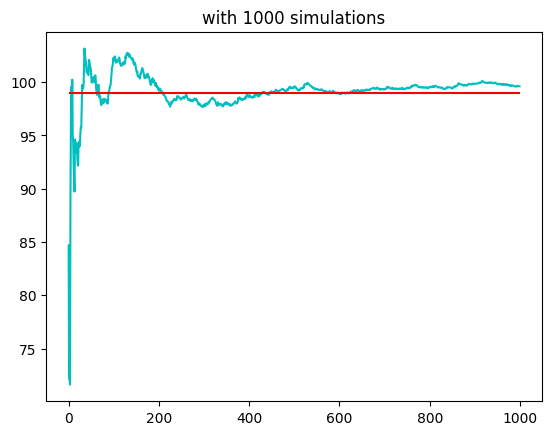

result of simulation :98.500
result of s_cum_mean: 98.500
result of exact solution: 99.005


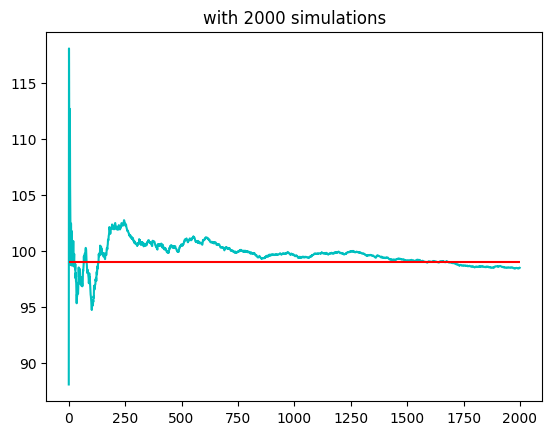

result of simulation :99.335
result of s_cum_mean: 99.335
result of exact solution: 99.005


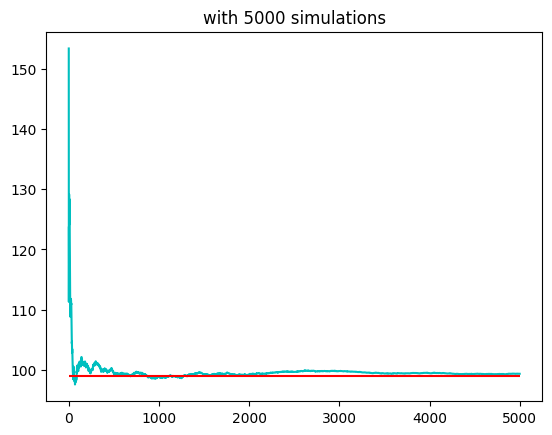

result of simulation :98.775
result of s_cum_mean: 98.775
result of exact solution: 99.005


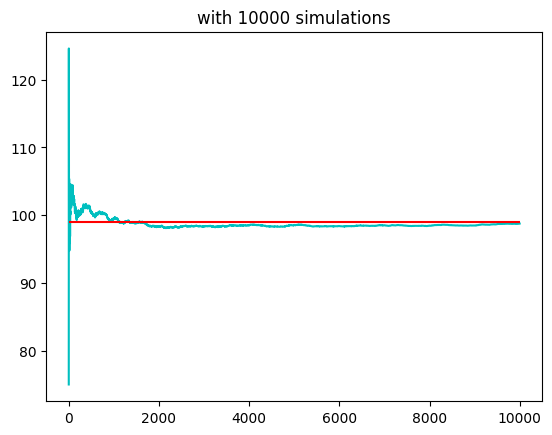

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def test_BSEquation():
    s0 = 100
    vol = 0.3
    r = 0.02
    d = 0.01
    maturity = 1

    nSimulation_list = [1000, 2000, 5000, 10 ** 4]		# 표본의 개수
    drift = (r - d - 0.5 * vol ** 2) # maturity	#S_T 계산을 위해 효율적으로 drift와
    volsqrtmat = vol * np.sqrt(maturity)	#diffusion 항을 따로 계산해 놓음

    for nSimulation in nSimulation_list:
        rn = np.random.normal(size=nSimulation)	# 표본의 개수만큼 정규분포 난수를 추출
        s_maturity = s0 * np.exp(drift + volsqrtmat * rn)

        s_cum_mean = np.cumsum(s_maturity) / np.arange(1, nSimulation + 1) * np.exp(-r * maturity)
            # s_maturity 의 원소값을 누적으로 합한 것을 합해진 숫자만큼으로 나눈 값, 즉 표본 첫 i개의 평균
            # 을 의미. 여기에 할인팩터를 곱함

        simulation_result = np.mean(s_maturity) * np.exp(-r * maturity)
            # 전체 표본의 평균에 할인팩터를 곱함

        exact_solution = s0 * np.exp(-d * maturity)
            # exact solution : S0 e^{-dT}

        print('result of simulation :{:.3f}'.format(simulation_result))
        print('result of s_cum_mean: {:.3f}'.format(s_cum_mean[-1]))
        print('result of exact solution: {:.3f}'.format(exact_solution))

        plt.title(f"with {nSimulation} simulations")
        plt.plot(s_cum_mean, color='c')
        plt.hlines(exact_solution, 0, nSimulation - 1, color='r')
        plt.show()

if __name__ == '__main__':
    test_BSEquation()